## **Life Expectancy (WHO)**
Statistical Analysis on factors influencing Life Expectancy

Link to the dataset https://www.kaggle.com/kumarajarshi/life-expectancy-who

## Regression

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Reading data into using pandas
data = pd.read_csv("C:/Users/Navee/OneDrive/Desktop/Life_Expect.csv") 

In [3]:
data.head(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

In [4]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [5]:
index = data[data["Life expectancy "].isna()].index

*Dropping the rows where the target variable `Life Expectancy` has null values*

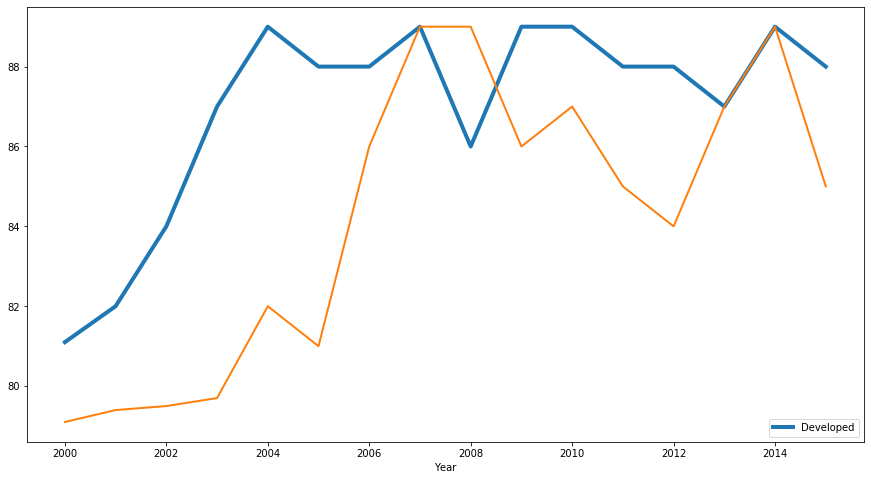

In [70]:
##
##Plotting the comparison between different Years
##
Developed = data[data['Status']=='Developed']
Developing = data[data['Status']=='Developing']
developed_pl= Developed.groupby(['Year'])['Life expectancy '].max()
developing_pl = Developing.groupby(['Year'])['Life expectancy '].max()
dvp = developed_pl.plot(linewidth=4,figsize=(15,8))
dp = developing_pl.plot(linewidth=2,figsize=(15,8))
dvp.legend(['Developed'],loc=4)

As we can clearly see that the Developed countries had high Life expectancy as compared to developing countries apart from a few exceptions in the years 2008 and 2009.

Text(0, 0.5, 'Life expectancy')

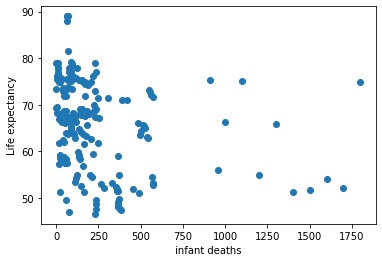

In [89]:
##
##Plotting the comparison between Infant deaths
##
plt.scatter(data['infant deaths'].unique(),data.groupby('infant deaths')['Life expectancy '].max())
plt.xlabel('infant deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

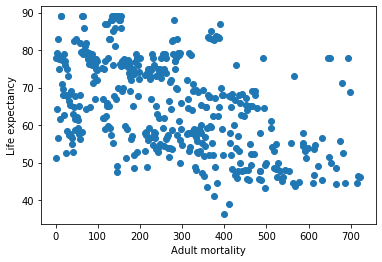

In [90]:
##
##Plotting the comparison between Adult Mortality
##
plt.scatter(data['Adult Mortality'].unique(),data.groupby('Adult Mortality')['Life expectancy '].max())
plt.xlabel('Adult mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

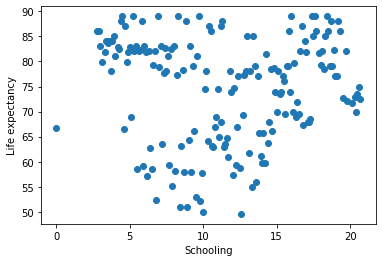

In [104]:
##
##Plotting the comparison between Schooling
##
plt.scatter(data['Schooling'].unique(),data.groupby('Schooling')['Life expectancy '].max())
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')


Text(0, 0.5, 'Life expectancy')

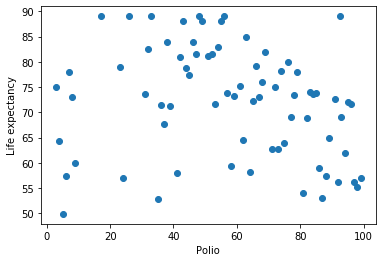

In [117]:
##
##Plotting the comparison between Immunization
##
plt.scatter(data['Polio'].unique(),data.groupby('Polio')['Life expectancy '].max())
plt.xlabel('Polio')
plt.ylabel('Life expectancy')


In [6]:
## Dropping the rows where the target variable has null values
data.drop(data.index[index],inplace=True)

Trying to find out null values in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

Columns `Alcohol, Hepatitis B, BMI ,Polio ,Total expenditure ,Diphtheria ,GDP ,Population ,thinness  1-19 years ,thinness 5-9 years,Income composition of resources ,Schooling` have null values.

*Plotting all variables to find the skewness of data*

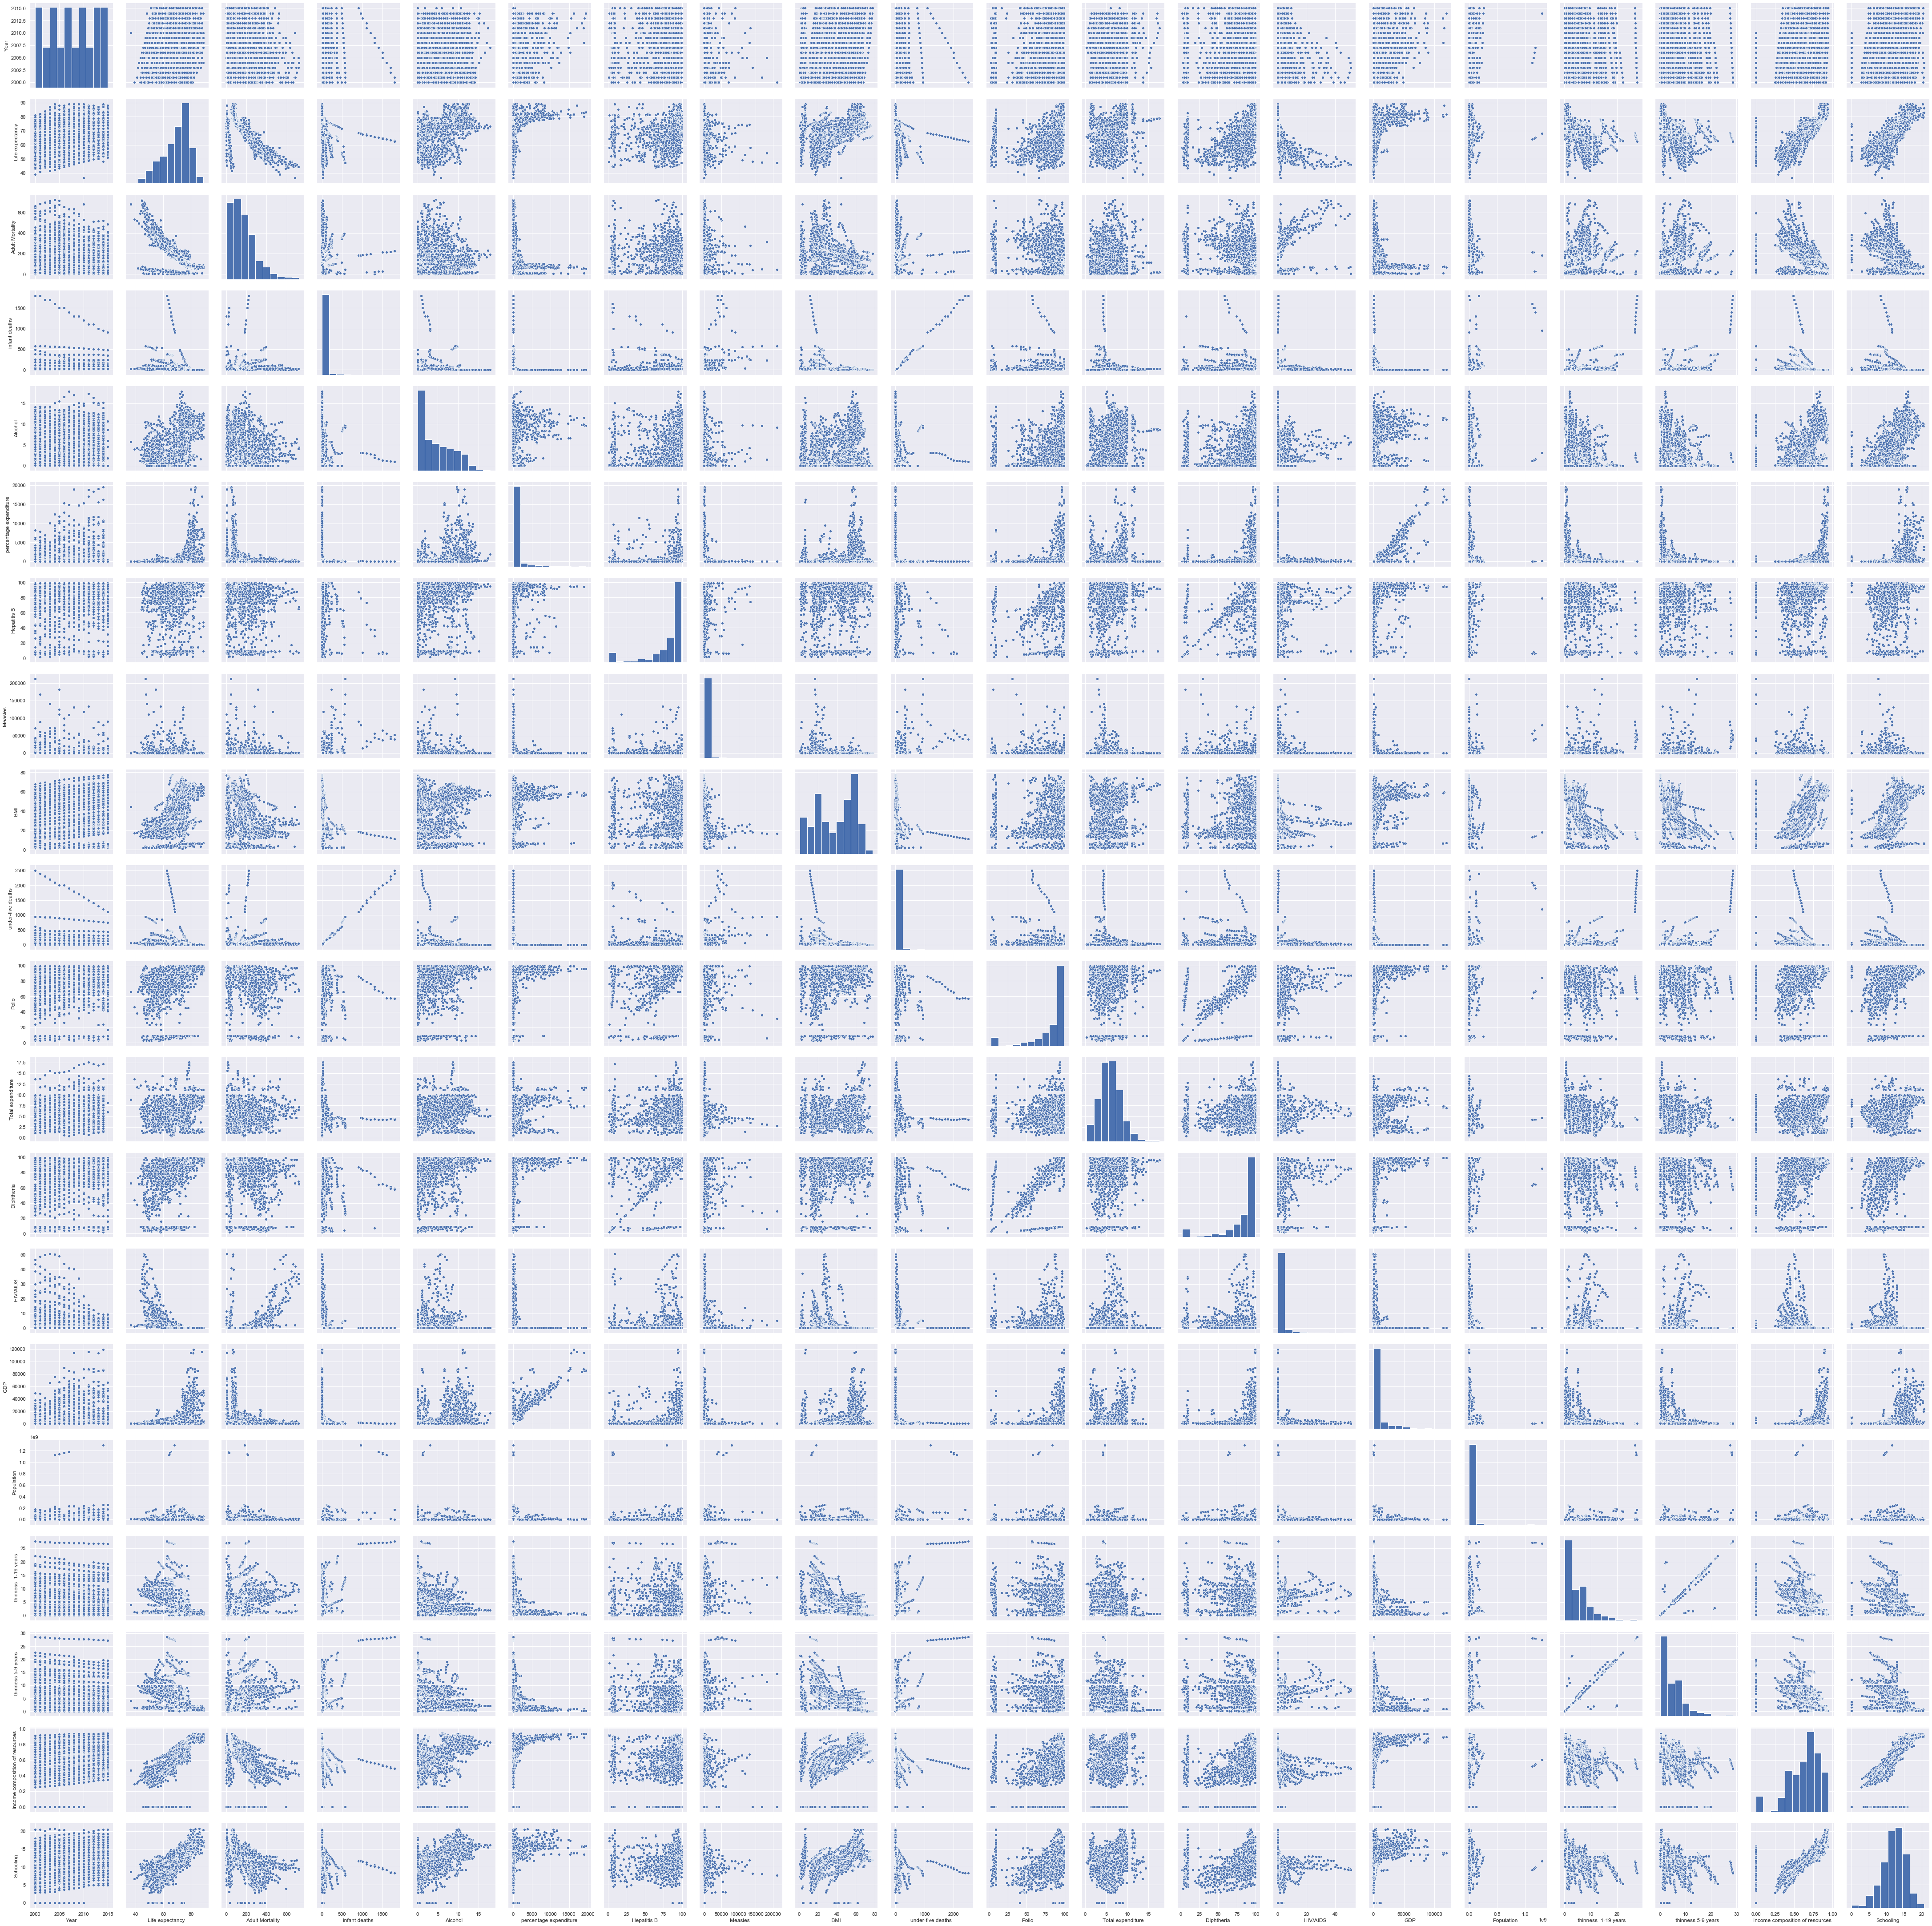

In [9]:
%matplotlib inline
import seaborn as sns
sns.set()
cos = data.columns
sns.pairplot(data[cos], height = 3)
plt.show()

### Data Preprocessing

In [2]:
##
##Imputing values such as mean and median to fill the null values.
##

In [10]:
data["Alcohol"]=data.groupby(["Status"])["Alcohol"].transform(lambda x: x.fillna(x.median()))

In [111]:
data["Hepatitis B"]=data.groupby(["Status"])["Hepatitis B"].transform(lambda x:x.fillna(x.median()))

In [12]:
data[" BMI "] = data.groupby(["Status"])[" BMI "].transform(lambda x:x.fillna(x.mean()))

In [115]:
data["Polio"] = data.groupby(["Country"])["Polio"].transform(lambda x:x.fillna(x.median()))

In [14]:
data["Total expenditure"] = data.groupby(["Status"])["Total expenditure"].transform(lambda x:x.fillna(x.mean()))

In [15]:
data["Diphtheria "] = data.groupby(["Country"])["Diphtheria "].transform(lambda x:x.fillna(x.median()))

In [16]:
data["GDP"] = data.groupby(["Status"])["GDP"].transform(lambda x:x.fillna(x.median()))

In [106]:
data["Population"] = data.groupby(["Status"])["Population"].transform(lambda x:x.fillna(x.median()))

In [18]:
data[" thinness  1-19 years"] = data.groupby(["Status"])[" thinness  1-19 years"].transform(lambda x:x.fillna(x.median()))

In [19]:
data[" thinness 5-9 years"] = data.groupby(["Status"])[" thinness 5-9 years"].transform(lambda x:x.fillna(x.median()))

In [20]:
data["Income composition of resources"] = data.groupby(["Status"])["Income composition of resources"].transform(lambda x:x.fillna(x.mean()))

In [103]:
data["Schooling"] = data.groupby(["Status"])["Schooling"].transform(lambda x:x.fillna(x.mean()))

**Creating dummy variables for categorical variables**

In [22]:
data = pd.concat([data,pd.get_dummies(data["Status"])],axis=1)
data = pd.concat([data,pd.get_dummies(data["Year"])],axis=1)

In [23]:
X=data.drop(["Life expectancy ","Country","Status","Year"],axis=1)
y=data["Life expectancy "]

Splitting into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

### Using Standard Scaler for scaling because the data is skewed and does not follow normal distribution from the above graphs, and even to address the outliers where the data will be standardized

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)

In [27]:
X_test = sc.transform(X_test)

## **Linear Regression**

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
## Using Linear Regression with Grid Search

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from  sklearn.linear_model import Ridge
ridge = Ridge()
from  sklearn.linear_model import Lasso
lasso = Lasso()
param = {knn:{'n_neighbors':[*range(1,5)]},
         lr:{'fit_intercept':[True,False]},
         ridge:{'alpha':[0.001,0.003,0.03,0.01, 0.1, 1, 10, 100]},
         lasso:{'alpha':[0.001,0.003,0.03,0.01, 0.1, 1, 10, 100]}}

In [30]:
## Using different modes to caluculate the score
regression = [knn,lr,ridge,lasso]

for mod in regression:
    grid = GridSearchCV(mod,param_grid = param[mod] , verbose=1,cv=3,n_jobs=-1,return_train_score= True)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.score(X_train,y_train))
    print(grid.score(X_test,y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    3.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s finished


{'n_neighbors': 4}
0.8819726355186387
0.7968241349449494
Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'fit_intercept': True}
0.8246678633388899
0.8213711760760674
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'alpha': 0.1}
0.8246882574694765
0.8213806905926178
Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'alpha': 0.003}
0.824612631823949
0.8217839346842466


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished


In [31]:
from sklearn.model_selection import GridSearchCV
param_grids = {'fit_intercept':[True,False]}
gridlr = GridSearchCV(lr,param_grid =param_grids ,
                      verbose=1,cv=5,n_jobs=-1,return_train_score= True)
gridlr.fit(X_train, y_train)
print(gridlr.best_params_)
print(gridlr.best_score_)
print(gridlr.scorer_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'fit_intercept': True}
0.8162317318156598
<function _passthrough_scorer at 0x12C64738>


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [32]:
result_lr = pd.DataFrame(gridlr.cv_results_)
result_lr.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004998      0.000620         0.001191        0.000403   
1       0.005785      0.000399         0.000605        0.000494   

  param_fit_intercept                    params  split0_test_score  \
0                True   {'fit_intercept': True}           0.849654   
1               False  {'fit_intercept': False}         -68.907581   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.825838           0.794680           0.805735  ...   
1         -53.620762         -63.116569         -51.954654  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.816232        0.019517                1            0.817672   
1       -59.640997        6.232213                2          -67.437190   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.820159            0.830668            0.828282   
1          -52.838884          -54.443813          -53.211193   

   split4_train_score  mean_train_score  std_train_score  
0            0.826963          0.824749         0.004971  
1          -53.909897        -56.368195         5.562227  

[2 rows x 21 columns]

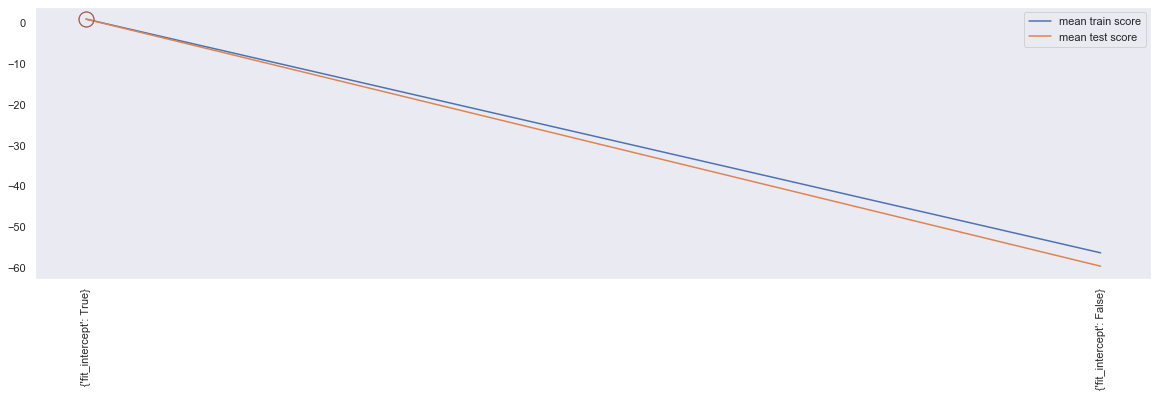

In [33]:
# Plotting the grid search values
import matplotlib.pyplot as plt
plt.subplots(figsize = (20,5))
plt.plot(range(result_lr['params'].shape[0]), result_lr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_lr['params'].shape[0]), result_lr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_lr['params'].shape[0]), result_lr['params'], rotation = 90)
plt.plot([gridlr.best_index_], result_lr['mean_train_score'][gridlr.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([gridlr.best_index_], result_lr['mean_test_score'][gridlr.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [34]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scoreslr = cross_val_score(gridlr, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoreslr))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Cross-validation scores: [0.84965398 0.8258381  0.79468047 0.80573503 0.80525109]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [35]:
Train_Score = scoreslr.mean()
print("Train Score {:.3f}".format(scoreslr.mean()))
lr.fit(X_train,y_train)
print("Test Score {:.3f}".format(gridlr.score(X_test,y_test)))
Test_Score = gridlr.score(X_test,y_test)

Train Score 0.816
Test Score 0.821


In [36]:
report_table = [['Linear Regression', gridlr.best_params_, lr.score(X_train,y_train) , lr.score(X_test,y_test)]]

## KNN Regression

In [37]:
## Fitting the model with KNN Regression using Grid Search
from sklearn.neighbors import KNeighborsRegressor

#Parameters Used are listed here
grid_params = {'n_neighbors':[*range(1,20,2)],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhattan']
              }
knn = KNeighborsRegressor()

# Fitting the model
gridknn = GridSearchCV(knn, param_grid = grid_params,cv=5, verbose=1,n_jobs=-1,return_train_score= True)
gridknn.fit(X_train, y_train)

#Printing the score
print("Best parameters: {}".format(gridknn.best_params_))
print("Best cross-validation accuracy: {:.2f}".format(gridknn.best_score_))
print("Train Set Score: {}".format(gridknn.score(X_train, y_train)))
print("Test Set Score: {}".format(gridknn.score(X_test,y_test)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.3s finished


Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation accuracy: 0.84
Train Set Score: 1.0
Test Set Score: 0.8608647945879343


In [38]:
result_knn = pd.DataFrame(gridknn.cv_results_)
result_knn.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0       0.020943      0.002092         0.069814        0.003153    euclidean   
1       0.025531      0.002053         0.078591        0.007658    euclidean   
2       0.026927      0.001093         0.091356        0.007637    euclidean   
3       0.029320      0.004118         0.084574        0.003753    euclidean   
4       0.027526      0.001492         0.085971        0.002706    euclidean   

  param_n_neighbors param_weights  \
0                 1       uniform   
1                 1      distance   
2                 3       uniform   
3                 3      distance   
4                 5       uniform   

                                              params  split0_test_score  \
0  {'metric': 'euclidean', 'n_neighbors': 1, 'wei...           0.696158   
1  {'metric': 'euclidean', 'n_neighbors': 1, 'wei...           0.696158   
2  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...           0.792994   
3  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...           0.796132   
4  {'metric': 'euclidean', 'n_neighbors': 5, 'wei...           0.806634   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.728630  ...         0.683228        0.031731               39   
1           0.728630  ...         0.683228        0.031731               39   
2           0.782269  ...         0.776176        0.014603               27   
3           0.788500  ...         0.780366        0.014098               24   
4           0.786671  ...         0.780919        0.014563               23   

   split0_train_score  split1_train_score  split2_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            0.894503            0.891050            0.893930   
3            1.000000            1.000000            1.000000   
4            0.857561            0.857301            0.859815   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            1.000000            1.000000          1.000000         0.000000  
1            1.000000            1.000000          1.000000         0.000000  
2            0.893056            0.897552          0.894018         0.002120  
3            1.000000            1.000000          1.000000         0.000000  
4            0.864846            0.868149          0.861534         0.004275  

[5 rows x 23 columns]

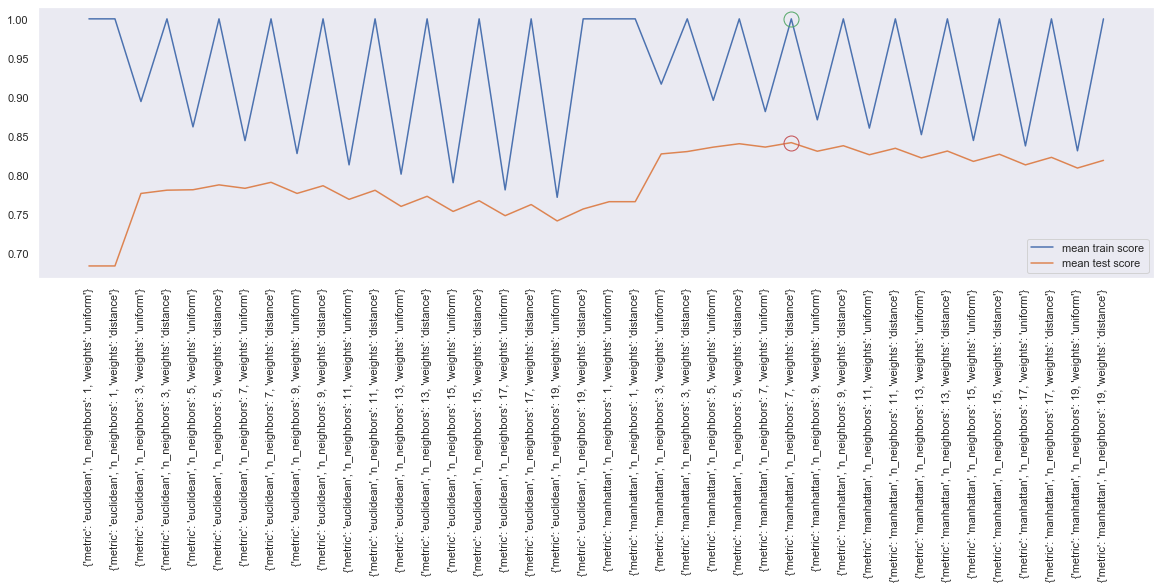

In [39]:
## Plotting different scores from KNN regression
import matplotlib.pyplot as plt
plt.subplots(figsize = (20,5))
plt.plot(range(result_knn['params'].shape[0]), result_knn['mean_train_score'], label = 'mean train score')
plt.plot(range(result_knn['params'].shape[0]), result_knn['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_knn['params'].shape[0]), result_knn['params'], rotation = 90)
plt.plot([gridknn.best_index_], result_knn['mean_train_score'][gridknn.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([gridknn.best_index_], result_knn['mean_test_score'][gridknn.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [40]:
scoresknn = cross_val_score(gridknn, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresknn))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.4s


Cross-validation scores: [0.85316929 0.84564941 0.82273133 0.83126479 0.84720637]


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.8s finished


In [41]:
## Fitting using best KNN parameters
knn = KNeighborsRegressor(n_neighbors=gridknn.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
print("Train Set Score: {}".format(knn.score(X_train, y_train)))
print("Test Set Score: {}".format(knn.score(X_test,y_test)))


Train Set Score: 0.8524962047379868
Test Set Score: 0.7899320440757449


In [42]:
report_table = report_table + [['KNN Regression',gridknn.best_params_ , knn.score(X_train, y_train), knn.score(X_test,y_test)]]

## SVM kernal 'rbf'

In [68]:
## Using SVM using kernel 'rbf' on Grid Search

from sklearn.svm import SVR
RBFSVM = SVR(kernel = 'rbf')
param_RadSVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Defined Parameters:\n{}".format(param_RadSVM))

Defined Parameters:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [69]:
## Fitting the model

grid_RbfSVM = GridSearchCV(RBFSVM, param_grid = param_RadSVM, cv=5, return_train_score=True,n_jobs=-1)
grid_RbfSVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [70]:
#The best parameters printed

print("Best parameters: {}".format(grid_RbfSVM.best_params_))
grid_RadSVMdata = pd.DataFrame(grid_RbfSVM.cv_results_)
grid_RadSVMdata = grid_RadSVMdata[['params','mean_train_score','mean_test_score']]
grid_RadSVMdata

Best parameters: {'C': 100, 'gamma': 0.01}


params  mean_train_score  mean_test_score
0   {'C': 0.001, 'gamma': 0.001}         -0.084786        -0.088484
1    {'C': 0.001, 'gamma': 0.01}         -0.075660        -0.079285
2     {'C': 0.001, 'gamma': 0.1}         -0.085775        -0.089617
3       {'C': 0.001, 'gamma': 1}         -0.086962        -0.090853
4      {'C': 0.001, 'gamma': 10}         -0.087024        -0.090913
5     {'C': 0.001, 'gamma': 100}         -0.087024        -0.090913
6    {'C': 0.01, 'gamma': 0.001}         -0.062745        -0.066315
7     {'C': 0.01, 'gamma': 0.01}          0.025879         0.022226
8      {'C': 0.01, 'gamma': 0.1}         -0.072988        -0.078052
9        {'C': 0.01, 'gamma': 1}         -0.084995        -0.090360
10      {'C': 0.01, 'gamma': 10}         -0.085541        -0.090907
11     {'C': 0.01, 'gamma': 100}         -0.085541        -0.090907
12    {'C': 0.1, 'gamma': 0.001}          0.135676         0.132152
13     {'C': 0.1, 'gamma': 0.01}          0.568543         0.563373
14      {'C': 0.1, 'gamma': 0.1}          0.050730         0.034031
15        {'C': 0.1, 'gamma': 1}         -0.065399        -0.085518
16       {'C': 0.1, 'gamma': 10}         -0.070785        -0.090937
17      {'C': 0.1, 'gamma': 100}         -0.070811        -0.090967
18      {'C': 1, 'gamma': 0.001}          0.711994         0.707303
19       {'C': 1, 'gamma': 0.01}          0.835429         0.823797
20        {'C': 1, 'gamma': 0.1}          0.574568         0.494182
21          {'C': 1, 'gamma': 1}          0.118670        -0.034854
22         {'C': 1, 'gamma': 10}          0.073201        -0.086232
23        {'C': 1, 'gamma': 100}          0.072931        -0.086608
24     {'C': 10, 'gamma': 0.001}          0.821807         0.813463
25      {'C': 10, 'gamma': 0.01}          0.898569         0.871332
26       {'C': 10, 'gamma': 0.1}          0.954444         0.747990
27         {'C': 10, 'gamma': 1}          0.885058         0.150844
28        {'C': 10, 'gamma': 10}          0.857625        -0.011317
29       {'C': 10, 'gamma': 100}          0.857095        -0.014917
30    {'C': 100, 'gamma': 0.001}          0.856927         0.842290
31     {'C': 100, 'gamma': 0.01}          0.948882         0.903236
32      {'C': 100, 'gamma': 0.1}          0.997512         0.755348
33        {'C': 100, 'gamma': 1}          0.999890         0.175297
34       {'C': 100, 'gamma': 10}          0.999889        -0.001737
35      {'C': 100, 'gamma': 100}          0.999889        -0.005867

In [71]:
#Printing best score

print("Best cross-validation accuracy: {:.2f}".format(grid_RbfSVM.best_score_))
print("Best parameters: {}".format(grid_RbfSVM.best_params_))
print("Train Set Score: {}".format(grid_RbfSVM.score(X_train, y_train)))
print("Test Set Score: {}".format(grid_RbfSVM.score(X_test, y_test)))

Best cross-validation accuracy: 0.90
Best parameters: {'C': 100, 'gamma': 0.01}
Train Set Score: 0.9486518389977292
Test Set Score: 0.9097774420892433


In [72]:
rbfsvm_result = pd.DataFrame(grid_RbfSVM.cv_results_)
rbfsvm_result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.308768      0.007068         0.054654        0.001934   0.001   
1       0.310170      0.007490         0.053656        0.001466   0.001   
2       0.372602      0.035662         0.065026        0.006628   0.001   
3       0.497668      0.038056         0.056649        0.001934   0.001   
4       0.840750      0.018303         0.124268        0.011188   0.001   

  param_gamma                        params  split0_test_score  \
0       0.001  {'C': 0.001, 'gamma': 0.001}          -0.089715   
1        0.01   {'C': 0.001, 'gamma': 0.01}          -0.080586   
2         0.1    {'C': 0.001, 'gamma': 0.1}          -0.090902   
3           1      {'C': 0.001, 'gamma': 1}          -0.092117   
4          10     {'C': 0.001, 'gamma': 10}          -0.092155   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0          -0.126936          -0.040958  ...        -0.088484        0.038799   
1          -0.116480          -0.032253  ...        -0.079285        0.038408   
2          -0.127813          -0.042140  ...        -0.089617        0.038789   
3          -0.129583          -0.043189  ...        -0.090853        0.038914   
4          -0.129645          -0.043268  ...        -0.090913        0.038906   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.086688           -0.085720   
1               23           -0.078004           -0.075378   
2               28           -0.087713           -0.086473   
3               30           -0.088853           -0.088135   
4               33           -0.088896           -0.088195   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.085093           -0.084065           -0.082363   
1           -0.076329           -0.074759           -0.073831   
2           -0.086112           -0.085144           -0.083432   
3           -0.087154           -0.086294           -0.084376   
4           -0.087238           -0.086357           -0.084431   

   mean_train_score  std_train_score  
0         -0.084786         0.001481  
1         -0.075660         0.001427  
2         -0.085775         0.001432  
3         -0.086962         0.001557  
4         -0.087024         0.001555  

[5 rows x 22 columns]

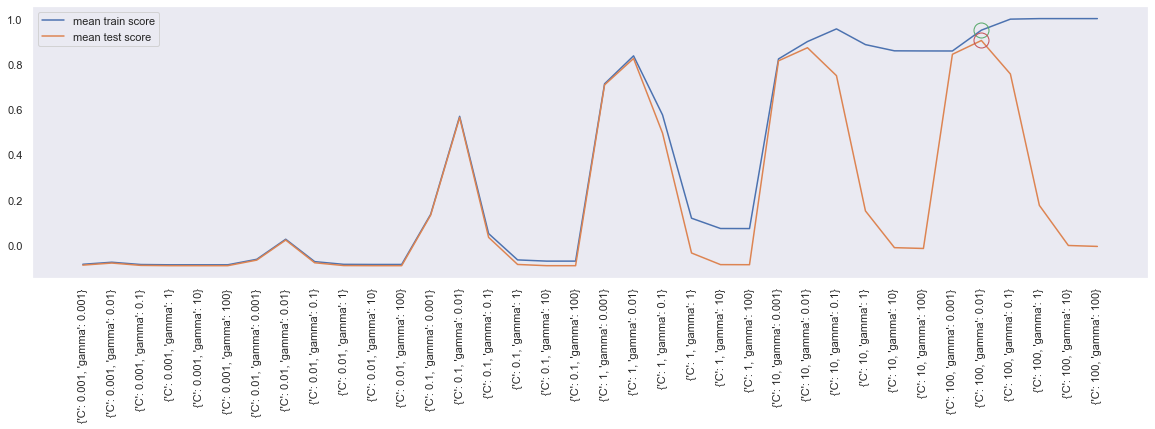

In [73]:
#Plotting the SVM kernel best results

import matplotlib.pyplot as plt
plt.subplots(figsize = (20,5))
plt.plot(range(rbfsvm_result['params'].shape[0]), rbfsvm_result['mean_train_score'], label = 'mean train score')
plt.plot(range(rbfsvm_result['params'].shape[0]), rbfsvm_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(rbfsvm_result['params'].shape[0]), rbfsvm_result['params'], rotation = 90)
plt.plot([grid_RbfSVM.best_index_], rbfsvm_result['mean_train_score'][grid_RbfSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid_RbfSVM.best_index_], rbfsvm_result['mean_test_score'][grid_RbfSVM.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [74]:
# Fitting using the best model
RBFSVM = SVR(kernel = 'rbf',C=grid_RbfSVM.best_params_['C'],gamma=grid_RbfSVM.best_params_['gamma'])
RBFSVM.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## As we can see from the table and plot that the SVM kernel with rbf is the **BEST** model with Train Score of 0.948652 and Test Score of 0.90977

In [95]:
from sklearn.svm import SVR
svm_rbf_model = SVR(kernel = 'rbf',C= 100,gamma= 0.01)

In [96]:
svm_rbf_model.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [97]:
print('Train Score : ',svm_rbf_model.score(X_train,y_train))

Train Score :  0.9486518389977292


In [98]:
print('Test Score :',svm_rbf_model.score(X_test,y_test))

Test Score : 0.9097774420892433
